In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
from sklearn.linear_model import LinearRegression

df = pd.read_csv("survey_results_public.csv")
pd.set_option('display.max_row', 500)
pd.set_option('display.float_format', '{:.2f}'.format)
'''

df = df.drop(columns=['ResponseId','CodingActivities','Employment','OrgSize','TechList','PurchaseInfluence','BuyNewTool','PlatformHaveWorkedWith','PlatformWantToWorkWith','Q120','DatabaseHaveWorkedWith','DatabaseWantToWorkWith','WebframeHaveWorkedWith','WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith','NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI', 'AISelect',
       'AISent', 'AIAcc', 'AIBen','Unnamed: 0','MainBranch',
       'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'AIToolInterested in Using', 'AIToolCurrently Using',
       'AIToolNot interested in Using', 'AINextVery different',
       'AINextNeither different nor similar', 'AINextSomewhat similar',
       'AINextVery similar', 'AINextSomewhat different', 'TBranch', 'ICorPM',
       'WorkExp', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4',
       'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8',
       'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching',
       'TimeAnswering', 'SurveyLength','SurveyEase','CompTotal','ProfessionalTech', 'Industry'],axis=1)
'''

''' Não uteis
    CodingActivities
    Employment
    OrgSize
    TechList
    PurchaseInfluence
    BuyNewTool
    Currency
'''
''' Kinda
    LearnCode
    LearnCodeOnline
    LearnCodeCoursesCert
    YearsCode
    DevType
    LanguageHaveWorkedWith
    AISearchHaveWorkedWith
    WorkExp
    TimeAnswering
'''
''' Uteis
    EdLevel
    RemoteWork
    Country
    ConvertedCompYearly
'''
print(df.columns)



Index(['Age', 'RemoteWork', 'EdLevel', 'LearnCode', 'DevType', 'Country',
       'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'ConvertedCompYearly'],
      dtype='object')


In [312]:
lang = pd.read_csv('languages.csv')
lang23 = lang[['LanguageHaveWorkedWith2023','LanguageWantToWorkWith2023']]
a = lang23['LanguageWantToWorkWith2023'].dropna().str.split(';',expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageHaveWorkedWith2023"})
b = lang23['LanguageHaveWorkedWith2023'].dropna().str.split(';',expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageWantToWorkWith2023"})
merged_df23 = pd.merge(a, b, on="value", how="outer",suffixes=('_HaveWorkedWith2023', '_WantToWorkWith2023')).dropna()

lang22 = lang[['LanguageHaveWorkedWith2022','LanguageWantToWorkWith2022']]
a = lang22['LanguageWantToWorkWith2022'].dropna().str.split(';',expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageHaveWorkedWith2022"})
b = lang22['LanguageHaveWorkedWith2022'].dropna().str.split(';',expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageWantToWorkWith2022"})
merged_df22 = pd.merge(a, b, on="value", how="outer",suffixes=('_HaveWorkedWith2022', '_WantToWorkWith2022')).dropna()

lang21 = lang[['LanguageHaveWorkedWith2021','LanguageWantToWorkWith2021']]
a = lang21['LanguageWantToWorkWith2021'].dropna().str.split(';',expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageHaveWorkedWith2021"})
b = lang21['LanguageHaveWorkedWith2021'].dropna().str.split(';',expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageWantToWorkWith2021"})
merged_df21 = pd.merge(a, b, on="value", how="outer",suffixes=('_HaveWorkedWith2021', '_WantToWorkWith2021')).dropna()


lang20 = lang[['LanguageHaveWorkedWith2020', 'LanguageWantToWorkWith2020']]
a = lang20['LanguageWantToWorkWith2020'].dropna().str.split(';', expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageHaveWorkedWith2020"})
b = lang20['LanguageHaveWorkedWith2020'].dropna().str.split(';', expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageWantToWorkWith2020"})
merged_df20 = pd.merge(a, b, on="value", how="outer", suffixes=('_HaveWorkedWith2020', '_WantToWorkWith2020')).dropna()


lang19 = lang[['LanguageHaveWorkedWith2019', 'LanguageWantToWorkWith2019']]
a = lang19['LanguageWantToWorkWith2019'].dropna().str.split(';', expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageHaveWorkedWith2019"})
b = lang19['LanguageHaveWorkedWith2019'].dropna().str.split(';', expand=True).stack().reset_index(level=1, drop=True).value_counts().reset_index().rename(columns={"index": "value", 0: "LanguageWantToWorkWith2019"})
merged_df19 = pd.merge(a, b, on="value", how="outer", suffixes=('_HaveWorkedWith2019', '_WantToWorkWith2019')).dropna()



In [313]:
merged_df19_20 = pd.merge(merged_df19, merged_df20, on="value", how="outer").dropna()
merged_df19_20_21 = pd.merge(merged_df19_20, merged_df21, on="value", how="outer").dropna()
merged_df19_20_21_22 = pd.merge(merged_df19_20_21, merged_df22, on="value", how="outer").dropna()
merged_all = pd.merge(merged_df19_20_21_22, merged_df23, on="value", how="outer").dropna()


In [314]:
merged_all[['value','count_WantToWorkWith2022','count_WantToWorkWith2023']]
merged_all = merged_all.sort_values('count_HaveWorkedWith2023')[::-1].head(10)
merged_all.set_index('value',inplace=True)
wanttoworkwith = merged_all[['count_WantToWorkWith2019','count_WantToWorkWith2020','count_WantToWorkWith2021','count_WantToWorkWith2022','count_WantToWorkWith2023']]
haveworkedwith = merged_all[['count_HaveWorkedWith2019','count_HaveWorkedWith2020','count_HaveWorkedWith2021','count_HaveWorkedWith2022','count_HaveWorkedWith2023',]]


In [332]:
wanttoworkwith.columns = [2019,2020,2021,2022,2023]
wanttoworkwith_transpose = wanttoworkwith.T.reset_index()
wanttoworkwith_transpose = wanttoworkwith_transpose.rename(columns={'index': 'Year'})
model = LinearRegression()
X = wanttoworkwith_transpose[['Year']].values

years = [2024, 2025, 2026, 2027, 2028]
wanttoworkwith_predict = pd.DataFrame()
for year in years:
    data = []
    for language in wanttoworkwith_transpose.columns[1:]:
        y = wanttoworkwith_transpose[language].values
        model.fit(X, y)
        prediction = model.predict([[year]])
        data.append(prediction[0])  
    wanttoworkwith_predict[f'{year}'] = data

wtww_noindex = wanttoworkwith.reset_index(drop=True)
wanttoworkwith_result = pd.concat([wtww_noindex,wanttoworkwith_predict],axis=1)
wanttoworkwith_result = wanttoworkwith_result.astype(int)
index = wanttoworkwith.reset_index().value
wanttoworkwith_result = wanttoworkwith_result.set_index(index)
wanttoworkwith_result = wanttoworkwith_result.reset_index(drop=False).rename(columns={'value': 'Languages'})

#wanttoworkwith_result.to_csv('wanttoworkwith_predicted.csv',index=False)

In [333]:
haveworkedwith.columns = [2019,2020,2021,2022,2023]
haveworkedwith_transpose = haveworkedwith.T.reset_index()
haveworkedwith_transpose = haveworkedwith_transpose.rename(columns={'index': 'Year'})
model = LinearRegression()
X = haveworkedwith_transpose[['Year']].values

years = [2024, 2025, 2026, 2027, 2028]
haveworkedwith_predict = pd.DataFrame()
for year in years:
    data = []
    for language in haveworkedwith_transpose.columns[1:]:
        y = haveworkedwith_transpose[language].values
        model.fit(X, y)
        prediction = model.predict([[year]])
        data.append(prediction[0])  
    haveworkedwith_predict[f'{year}'] = data

hww_noindex = wanttoworkwith.reset_index(drop=True)
haveworkedwith_result = pd.concat([hww_noindex,haveworkedwith_predict],axis=1)
haveworkedwith_result = haveworkedwith_result.astype(int)
index = wanttoworkwith.reset_index().value
haveworkedwith_result = haveworkedwith_result.set_index(index)
haveworkedwith_result = haveworkedwith_result.reset_index(drop=False).rename(columns={'value': 'Languages'})

haveworkedwith_result.to_csv('haveworkedwith_predicted.csv',index=False)

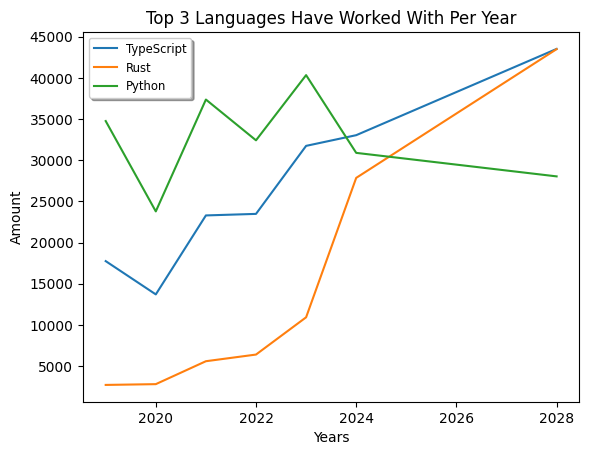

In [326]:
haveworkedwith_result_sorted = haveworkedwith_result.sort_values(by='2028', ascending=False)

top_3_languages = haveworkedwith_result_sorted.head(3)

top_3_languages = top_3_languages.set_index('Languages')
top_3_languages = top_3_languages.T
top_3_languages = top_3_languages.rename_axis('Years').reset_index()
top_3_languages = top_3_languages.reset_index(drop=True)

plt.xlabel("Years")
plt.ylabel("Amount")
plt.title("Top 3 Languages Have Worked With Per Year")
plt.plot(top_3_languages['Years'], top_3_languages['TypeScript'], label="TypeScript")
plt.plot(top_3_languages['Years'], top_3_languages['Rust'], label="Rust")
plt.plot(top_3_languages['Years'], top_3_languages['Python'], label="Python")

plt.legend(shadow=True,fontsize="small")
plt.show()

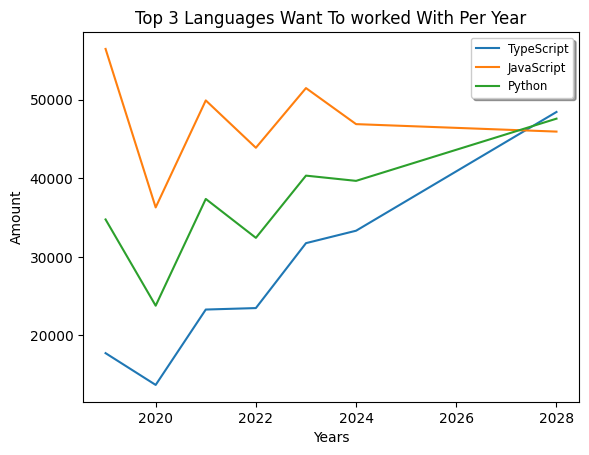

In [329]:
wanttoworkwith_resultwith_result_sorted = wanttoworkwith_result.sort_values(by='2028', ascending=False)

top_3_languages = wanttoworkwith_resultwith_result_sorted.head(3)

top_3_languages = top_3_languages.set_index('Languages')
top_3_languages = top_3_languages.T
top_3_languages = top_3_languages.rename_axis('Years').reset_index()
top_3_languages = top_3_languages.reset_index(drop=True)


plt.xlabel("Years")
plt.ylabel("Amount")
plt.title("Top 3 Languages Want To worked With Per Year")
plt.plot(top_3_languages['Years'], top_3_languages['TypeScript'], label="TypeScript")
plt.plot(top_3_languages['Years'], top_3_languages['JavaScript'], label="JavaScript")
plt.plot(top_3_languages['Years'], top_3_languages['Python'], label="Python")

plt.legend(shadow=True,fontsize="small")
plt.show()


<Figure size 1600x800 with 0 Axes>

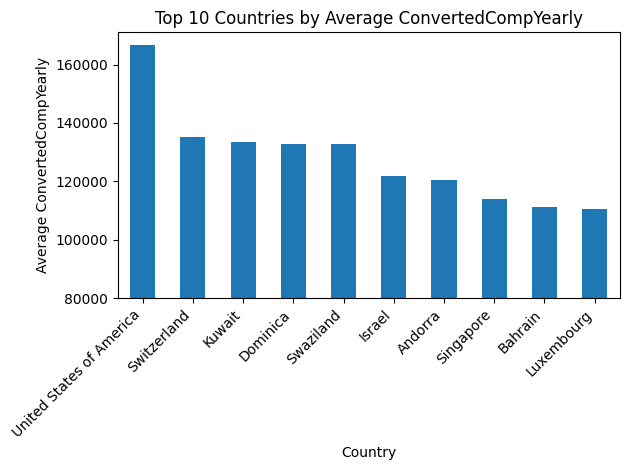

In [ ]:
ConvertedCompYearly = df[['Country','ConvertedCompYearly']].dropna()
ConvertedCompYearly = ConvertedCompYearly[(ConvertedCompYearly['ConvertedCompYearly'] > 13000.00) & (ConvertedCompYearly['ConvertedCompYearly'] < 1000000.00)]

ConvertedCompYearly = ConvertedCompYearly.groupby("Country")
ConvertedCompYearly = ConvertedCompYearly.mean()
ConvertedCompYearly = ConvertedCompYearly.sort_values(by='ConvertedCompYearly')[::-1]
ConvertedCompYearly['ConvertedCompYearly'] = ConvertedCompYearly['ConvertedCompYearly'] - 80000


plt.figure(figsize=(16, 8))
ConvertedCompYearly.head(10).plot(kind='bar', legend=False, bottom=80000)
plt.xlabel('Country')
plt.ylabel('Average ConvertedCompYearly')
plt.title('Top 10 Countries by Average ConvertedCompYearly')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
RemoteWork = df[['RemoteWork', 'ConvertedCompYearly']].dropna()
RemoteWork = RemoteWork[(RemoteWork['ConvertedCompYearly'] > 1000.00) & (RemoteWork['ConvertedCompYearly'] < 1000000.00)]
RemoteWork.replace('Hybrid (some remote, some in-person)','Hybrid',inplace=True)
RemoteWork = RemoteWork.groupby("RemoteWork")
RemoteWork = RemoteWork.mean()
RemoteWork = RemoteWork.sort_values(by='ConvertedCompYearly')[::-1]
RemoteWork = RemoteWork.reset_index()


fig = go.Figure(go.Funnelarea(
    labels = RemoteWork.RemoteWork,
    values  = RemoteWork.ConvertedCompYearly,
    textinfo = "value",
    textfont_size=20,
    texttemplate="%{value:$,.2s}",
    textfont=dict(color='ivory')))

fig.update_layout(
    title='Average Salary Based on RemoteWork',
    height=400,  
    width=600,
    font=dict(color='black'),
    title_x=0.47, 
    title_y=0.95  
)
fig.show()

In [ ]:

EdLevel = df[['EdLevel',"ConvertedCompYearly"]].dropna()
EdLevel = EdLevel[(EdLevel['ConvertedCompYearly'] > 1000.00) & (EdLevel['ConvertedCompYearly'] < 1000000.00)]
EdLevel = EdLevel.groupby('EdLevel')
EdLevel = EdLevel.mean()
EdLevel = EdLevel.sort_values(by='ConvertedCompYearly')[::-1]
EdLevel = EdLevel.reset_index()
EdLevel.replace({'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secundary school'},inplace=True)

fig = go.Figure(data=go.Heatmap(
                   z=EdLevel['ConvertedCompYearly'][::-1].to_numpy().reshape(1, -1),  # Reshape for a single column and reverse order for vertical layout
                   y=EdLevel.EdLevel[::-1],  # Education levels in reversed order for vertical layout
                   x=['Average Compensation'],  # Single column label
                   colorscale='Plasma',  # Use the 'Plasma' colorscale
                   transpose=True))  # Transpose to swap the axes

fig.update_layout(
    title='Vertical Heatmap of Average Yearly Compensation by Education Level',
    yaxis_title='Education Level',
    xaxis_title='',
    yaxis={'type': 'category'},  # Treat y-axis as categorical data,
    height=400,  
    width=700
)

fig.show()

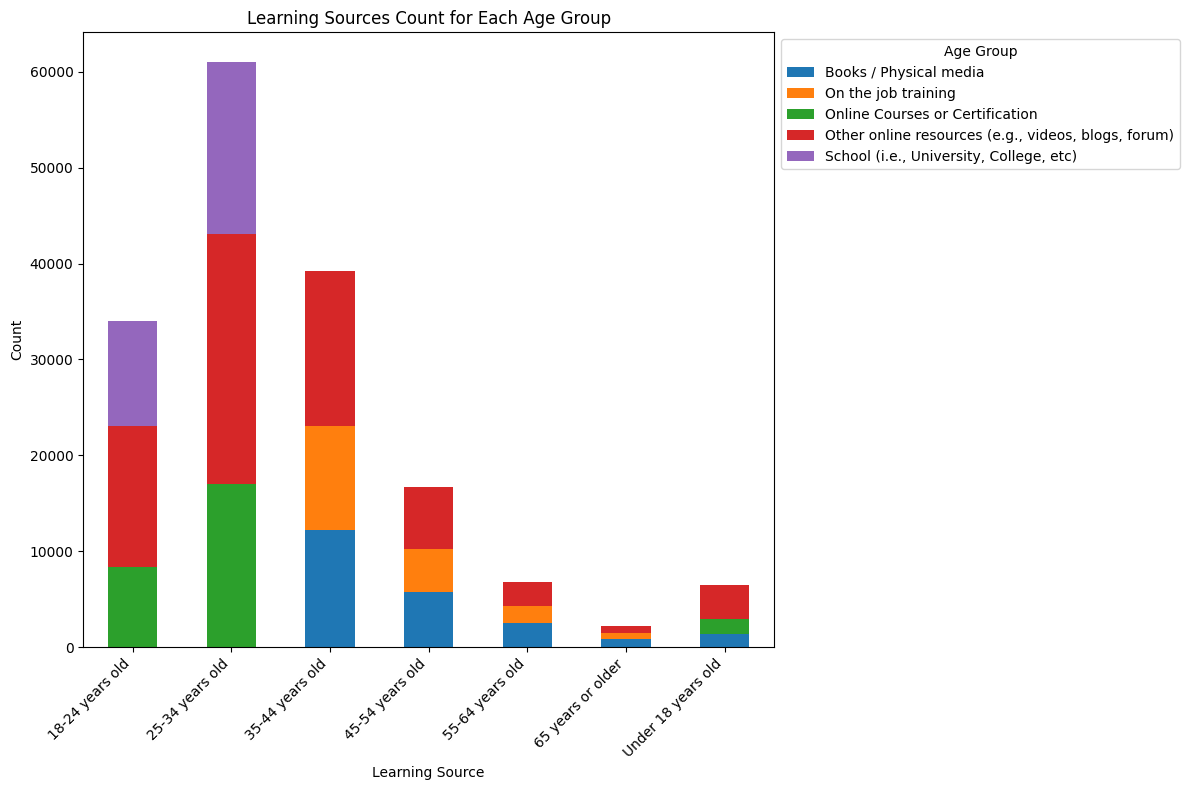

In [ ]:
LearnCode = df[['Age','LearnCode']].dropna()
LearnCode = LearnCode[LearnCode['Age'] != 'Prefer not to say']

array = []

for num, val in enumerate(LearnCode['LearnCode']):
    split = val.split(';')
    for item in split:
        array.append([LearnCode['Age'].iloc[num], item])
    

LearnCode = pd.DataFrame(array,columns=['Age', 'Learning Source'])

counts = LearnCode.groupby(['Age', 'Learning Source']).size().reset_index(name='Count')
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    top3_per_age = counts.groupby('Age').apply(lambda group: group.nlargest(3, 'Count')).reset_index(drop=True)


pivot_table = top3_per_age.pivot(index='Age', columns='Learning Source', values='Count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each learning source as a stacked bar
pivot_table.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Learning Source')
ax.set_ylabel('Count')
ax.set_title('Learning Sources Count for Each Age Group')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()